In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

<font size="5"><b>Importing Data</font></b>


In [2]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Project Datasets\Crop DataSet/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<font size="4"><b>Checking for Duplicated Values</font></b>

In [6]:
df.duplicated().sum()

0

<font size="5"><b>Checking Correlation </font></b>

In [7]:
df_dup=df.drop(['label'],axis=1)

In [8]:
df_corr=df_dup.corr()

<Axes: >

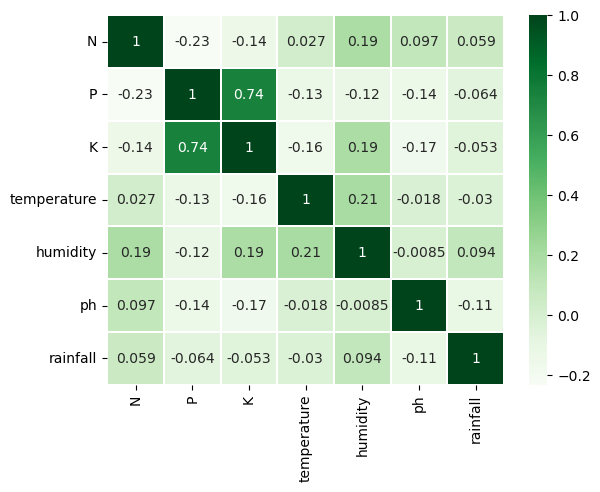

In [9]:
sns.heatmap(df_corr,cmap="Greens",annot=True,linewidths=0.2,linecolor='white')

<font size="5"><b>Seperating Feature and Target Variable</font></b>

In [10]:
X=df.drop(['label'],axis=1)

In [11]:
Y=df["label"]

<font size="5"><b>Label Encoding</font></b>

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
le.fit(Y)

LabelEncoder()

In [15]:
le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [16]:
Y=le.transform(Y)

In [17]:
Y

array([20, 20, 20, ...,  5,  5,  5])

<font size="5"><b>Splitting Training and Testing data</font></b>

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [19]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
290,60,61,78,20.712193,19.836433,6.317153,94.036599
37,95,39,36,23.863305,83.152508,5.561399,285.249365
1507,0,123,205,22.027754,92.961295,5.790993,121.134918
2168,112,39,29,26.124922,63.374792,6.726529,147.803530
1309,118,13,54,24.413119,89.815740,6.039585,44.078435
...,...,...,...,...,...,...,...
789,60,59,22,31.868473,66.742175,7.191523,74.222386
968,14,25,40,20.073865,90.978197,6.407872,103.708405
1667,36,29,13,20.681852,90.915105,7.829507,109.751393
1688,18,14,11,28.047995,90.006217,6.550814,117.131150


<font size="5"><b>Model Training</font></b>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [21]:
models={
    'logistic regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Support Vector Machine':SVC(),
    'K-Nearest Neighbour':KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'Ada Boost' : AdaBoostClassifier()
}

for name , model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    print(f"{name} has accuracy : {accuracy_score(y_test,y_pred)} ")

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic regression has accuracy : 0.9522727272727273 
Naive Bayes has accuracy : 0.9931818181818182 
Support Vector Machine has accuracy : 0.9704545454545455 
K-Nearest Neighbour has accuracy : 0.9636363636363636 
Decision Tree has accuracy : 0.990909090909091 
Extra Tree has accuracy : 0.9613636363636363 
RandomForestClassifier has accuracy : 0.990909090909091 
Bagging has accuracy : 0.990909090909091 
Gradient Boost has accuracy : 0.9840909090909091 
Ada Boost has accuracy : 0.12272727272727273 


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<font size="5"><b>Final Selection Of Model</font></b>

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(oob_score=True)
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [23]:
rfc.oob_score_

0.9943181818181818

In [24]:
N = int(input("N = "))
P = int(input("P = "))
K = int(input("K = "))
temperature = float(input("temperature = "))
humidity = float(input("humidity = "))
ph = float(input("ph = "))	
rainfall = float(input("rainfall = "))

data = np.array([[N,P,K,temperature,humidity,ph,rainfall]])

def predict_label(input_data):
    pred = rfc.predict(input_data)
    decoded_pred = le.inverse_transform(pred)
    return decoded_pred
predicted = predict_label(data)
print(predicted)

N =  45
P =  47
K =  46
temperature =  40
humidity =  2
ph =  7
rainfall =  104


['kidneybeans']


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
import pickle
with open("model.pkl", "wb") as model:
    pickle.dump(rfc, model)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)

In [26]:
print("Type of rfc:", type(rfc))
print("Type of le:", type(le))


Type of rfc: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Type of le: <class 'sklearn.preprocessing._label.LabelEncoder'>


In [28]:
import numpy as np
import pickle

# Load model and label encoder
with open('model.pkl', 'rb') as model_file:
    rfc = pickle.load(model_file)

with open('label_encoder.pkl', 'rb') as le_file:
    le = pickle.load(le_file)

# Test input data (adjust values to test different cases)
test_input = np.array([[45, 40, 40, 30.5, 80.0, 6.5, 200.0]])  # Example input

# Get prediction
pred = rfc.predict(test_input)
decoded_pred = le.inverse_transform(pred)

print("Test Prediction:", decoded_pred[0])  # Expected output should vary


Test Prediction: papaya


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
 <script>
        async function makePrediction() {
            const formData = {
                N: document.getElementById('N').value,
                P: document.getElementById('P').value,
                K: document.getElementById('K').value,
                temperature: document.getElementById('temperature').value,
                humidity: document.getElementById('humidity').value,
                ph: document.getElementById('ph').value,
                rainfall: document.getElementById('rainfall').value
            };

            try {
                const response = await fetch('http://127.0.0.1:5000/predict', {
                    method: 'POST',
                    headers: { 'Content-Type': 'application/json' },
                    body: JSON.stringify(formData)
                });

                if (!response.ok) {
                    throw new Error(`HTTP error! status: ${response.status}`);
                }

                const result = await response.json();
                document.getElementById('result').innerText = `Prediction: ${result.prediction}`;
            } catch (error) {
                console.error("Error:", error);
                document.getElementById('result').innerText = "An error occurred. Please try again.";
            }
        }
    </script>


In [ ]:
    # Predict and decode the label
    pred = rfc.predict(input_data)
    decoded_pred = le.inverse_transform(pred)
    
    return jsonify({'prediction': decoded_pred[0]})

In [29]:
print(le.classes_)

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [30]:
print(rfc.classes_)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [33]:
prediction = rfc.predict(data)
print("Raw Prediction:", prediction)
decoded_prediction = le.inverse_transform(prediction)
print("Decoded Prediction:", decoded_prediction)

Raw Prediction: [9]
Decoded Prediction: ['kidneybeans']


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
